In [1]:
from MieSppForce import green_func, frenel, fields
import numpy as np
eps_Au = frenel.get_interpolate('Au')

z0= 10
wl=800
stop = 35


GE0, GH0 = green_func.green_ref_00(wl, z0, eps_Au, stop)

GE = green_func.getGE(wl, eps_Au, z0, 1e-6, 0, z0, stop)
GH = green_func.getGH(wl, eps_Au, z0, 1e-6, 0, z0, stop)

phi = 0

rotGE = green_func.get_rotGE(wl, eps_Au, z0, 1e-6, phi, z0, stop)

rotGH = green_func.get_rotGH(wl, eps_Au, z0, 1e-6, phi, z0, stop)

rotGE0, rotGH0 = green_func.rot_green_ref_00(wl, z0, eps_Au, stop)

for i in range(3):
    for j in range(3):
        print('0: ',i+1,j+1, rotGH0[i,j])
        print('1: ',i+1,j+1, rotGH[i,j])





c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,


0:  1 1 0j
1:  1 1 0j
0:  1 2 (121327842908973.3+2161418656437.7563j)
1:  1 2 (122033219117322.75+3022646622250.5293j)
0:  1 3 0j
1:  1 3 0j
0:  2 1 (-121327842908973.3-2161418656437.7563j)
1:  2 1 (-121327842834547.72-2161418656890.262j)
0:  2 2 0j
1:  2 2 (-0+0j)
0:  2 3 0j
1:  2 3 (-463870.83270157105+8161.583853515423j)
0:  3 1 0j
1:  3 1 0j
0:  3 2 0j
1:  3 2 (-10086428.334765477-81726.9619413944j)
0:  3 3 0j
1:  3 3 0j


In [5]:

phi = 0
x = r * np.cos(phi)
y = r * np.sin(phi)
point = [x,y,z]
alpha = 25*np.pi/360
GE = green_func.getGE(wl, eps_Au, z0, r, phi, z, stop)
GH = green_func.getGH(wl, eps_Au, z0, r, phi, z, stop)
rotGE = green_func.get_rotGE(wl, eps_Au, z0, r, phi, z, stop)
rotGH = green_func.get_rotGH(wl, eps_Au, z0, r, phi, z, stop)
p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, alpha, 1, 0, 0, stop)

c_const = 299792458
k = 2*np.pi/wl*1e9
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7
omega = 2*np.pi*c_const/wl/1e-9

In [7]:
E =  k**2/eps0_const * GE @ p + 1j*omega*mu0_const*rotGH@m
H =  k**2 * GH @ m - 1j*omega*rotGE @ p

In [22]:
S

array([ 8.13890499e-09, -0.00000000e+00,  6.48166880e-10])

In [56]:
from MieSppForce import dipoles

eps_Si = frenel.get_interpolate('Si')

R = 295/2

dist = 2
z = 0
z0 = R+dist
wl=940
phi = np.linspace(0,2*np.pi, 100)
phase = -np.pi/2
a_angle = np.pi/4 #p pol
ANGLE = 25*np.pi/360
Sr = np.empty(len(phi))
STOP = 35

p,m = dipoles.calc_dipoles_v2(wl, eps_Au, [0,0,z0], R, eps_Si, ANGLE, 1, phase, a_angle, stop)
r = np.linspace(1, 500, 30)

ERPHI = np.empty((len(r), len(phi), 3), dtype=complex)
HRPHI = np.empty((len(r), len(phi), 3), dtype=complex)



for j in range(len(r)):
    for i in range(len(phi)):  
        E,H = fields.get_field(wl, eps_Au, ANGLE, phase, a_angle, stop, eps_Si, R, r[j], phi[i], z, z0 )
        ERPHI[j,i,:] = E[:,0]
        HRPHI[j,i,:] = H[:,0]


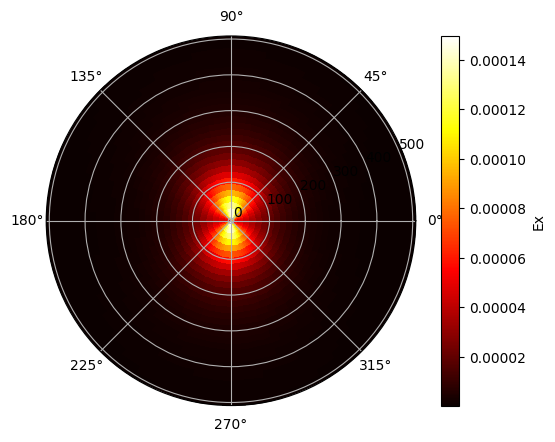

In [55]:
import numpy as np
import matplotlib.pyplot as plt

R, Phi = np.meshgrid(r, phi, indexing='ij')


# Строим colormap в полярной системе
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
pc = ax.pcolormesh(Phi, R, np.abs((HRPHI[:,:,1]*np.cos(Phi) - HRPHI[:,:,0]*np.sin(Phi)))**2, shading='auto', cmap='hot')

# Добавляем цветовую шкалу
fig.colorbar(pc, ax=ax, label='Ex')

In [3]:
from MieSppForce.directivity import get_directivity

D = get_directivity(wl, p,m, eps_Au)

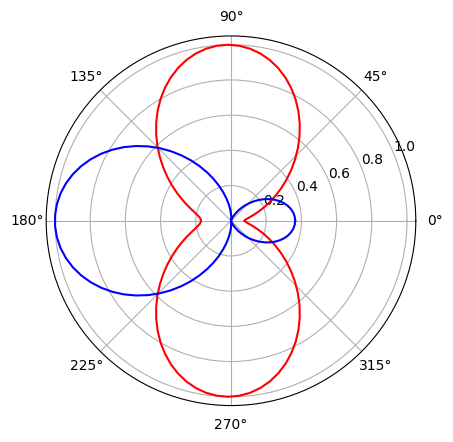

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(phi, Sr/Sr.max(), c='r')

ax.plot(phi, D(phi)/np.max(D(phi)), c='b')